In [7]:
import sys
import struct
import ctypes
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
import time
%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  
mydll = ctypes.cdll.LoadLibrary(r"D:\github\RelativicHeavyBall\x64\Debug\testPythonDLL.dll")

f = mydll.pythonWashtubTarget
mydll.pythonWashtubTarget.restype = ctypes.c_double
mydll.pythonWashtubTarget.argtypes = [ctypes.c_double, ctypes.c_double]

testFunc = mydll.washtubMulty
mydll.washtubMulty.restype = ctypes.POINTER(pointStruct)
mydll.washtubMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_bool,
                                          ctypes.c_bool,
                                          ctypes.c_double] 

print(time.strftime('%X %x %Z'))

_xStart = 1
_yStart = 0.5
_xSpeedStart = 0
_ySpeedStart = 0

_stepLimit = 100000
_targetAccuracy = 1e-20
_param = 1.0
_lightSpeed = 0.5
_useGradientHessian = True
_useHavyBallHessian = True
_h = 0.01

ret = testFunc(_xStart, _yStart, _xSpeedStart, _ySpeedStart, 
               _stepLimit, _targetAccuracy, _param, _lightSpeed, 
               _useGradientHessian, _useHavyBallHessian,
               _h)

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print("lineCount: ", ret.contents.lineCount)
print("allDataPointsCount: ", ret.contents.allDataPointsCount)
print("pointCounts: ", pointCounts)
print("xValues: ", xValues)
print("yValues: ", yValues)
print("zValues: ", zValues)

11:12:49 06/17/20 FLE Daylight Time
lineCount:  4
allDataPointsCount:  13892
pointCounts:  [3473 3473 3473 3473]
xValues:  [1.00000000e+00 9.96633175e-01 9.93277161e-01 ... 1.75036272e-06
 1.75036272e-06 1.75036272e-06]
yValues:  [ 5.00000000e-01  4.99577548e-01  4.99153250e-01 ... -5.44450402e-06
 -5.44450402e-06 -5.44450402e-06]
zValues:  [1.06250000e+00 1.04888960e+00 1.03545631e+00 ... 8.88071841e-22
 8.88071841e-22 8.88071841e-22]


<IPython.core.display.Javascript object>


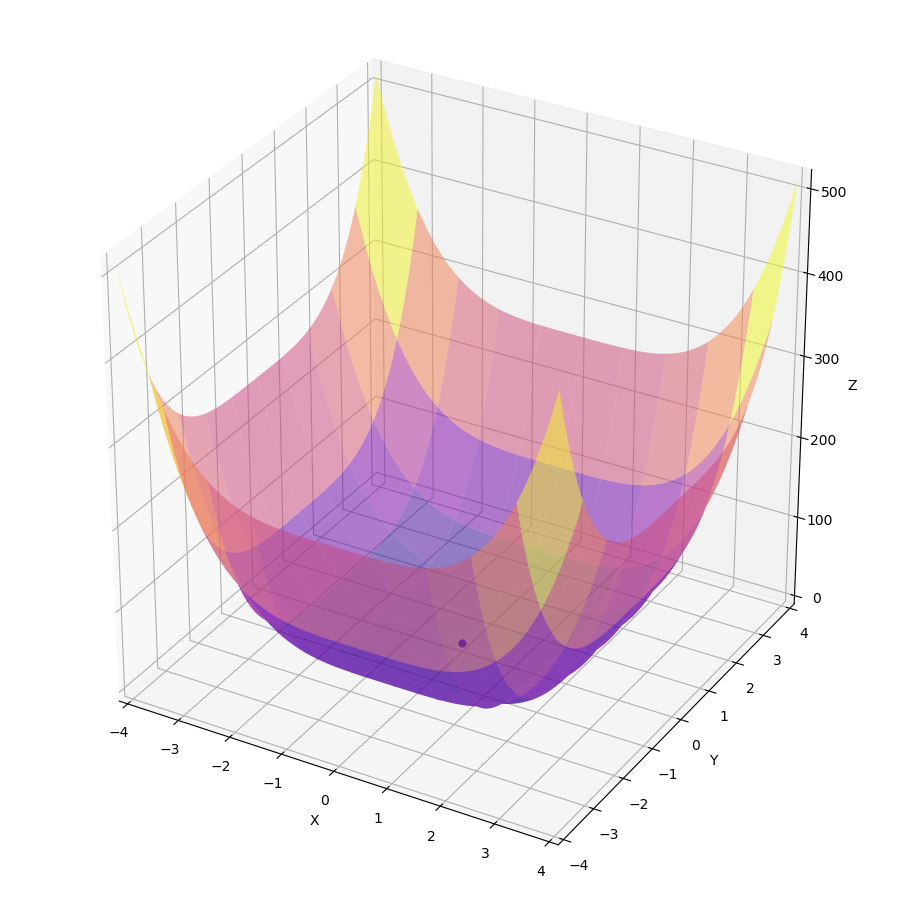

8.386737909623527e-05 8.38673782113836e-05 9.894691806095349e-17
9.388330736919047e-05 3.450618966669428e-05 7.910563721907437e-17


In [2]:
fig = plt.figure(figsize = (9, 9)) 
axe = p3.Axes3D(fig)

def gen1(n):
    for i in range(n):
        yield np.array([xValues[i], yValues[i], zValues[i]])
        
def gen2(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + i], yValues[pointCounts[0] + i], zValues[pointCounts[0] + i]])
        
def gen3(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + i], yValues[pointCounts[0] + pointCounts[1] + i], zValues[pointCounts[0] + pointCounts[1] + i]])

def gen4(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], yValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], zValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i]])
        
def animate(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

n1 = pointCounts[0]
data1 = np.array(list(gen1(n1))).T
line1, = axe.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1], 'g--')

n2 = pointCounts[1]
data2 = np.array(list(gen2(n2))).T
line2, = axe.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1], 'r--')

n3 = pointCounts[2]
data3 = np.array(list(gen3(n3))).T
line3, = axe.plot(data3[0, 0:1], data3[1, 0:1], data3[2, 0:1], 'b--')

n4 = pointCounts[3]
data4 = np.array(list(gen4(n4))).T
line4, = axe.plot(data4[0, 0:1], data4[1, 0:1], data4[2, 0:1], 'k--')

nx = 100
ny = 100
ax = -4.
bx = 4.0
ay = -4.0
by = 4.0

axe.set_xlim3d([ax, bx])
axe.set_xlabel('X')

axe.set_ylim3d([ay, by])
axe.set_ylabel('Y')

axe.set_zlim3d([0.0, f(ax, ay)])
axe.set_zlabel('Z')

xval = np.linspace(ax, bx, nx)
yval = np.linspace(ay, by, ny)
x, y = np.meshgrid(xval, yval)
z = [[f(xval[i], yval[j]) for i in range(nx)] for j in range(ny)]
z = np.array(z)

axe.plot_surface(x, y, z, rstride = 10, cstride = 10, cmap = cm.plasma, alpha=0.5)

colors = ['g', 'r', 'b', 'k']
s = 0
for x in range(ret.contents.lineCount):
    s += pointCounts[x]
    axe.scatter3D(xValues[s - 1], yValues[s - 1], zValues[s - 1], color = colors[x])
axe.scatter3D(0, 0, 0, color = 'w')
"""
ani1 = animation.FuncAnimation(fig, animate, n1, fargs=(data1, line1), interval=1, blit=False, repeat=False)
ani2 = animation.FuncAnimation(fig, animate, n2, fargs=(data2, line2), interval=1, blit=False, repeat=False)
ani3 = animation.FuncAnimation(fig, animate, n3, fargs=(data3, line3), interval=1, blit=False, repeat=False)
ani4 = animation.FuncAnimation(fig, animate, n4, fargs=(data4, line4), interval=1, blit=False, repeat=False)

"""
plt.show();

print(xValues[pointCounts[0] - 1], yValues[pointCounts[0] - 1], zValues[pointCounts[0] - 1])
print(xValues[ret.contents.allDataPointsCount - 1], yValues[ret.contents.allDataPointsCount - 1], zValues[ret.contents.allDataPointsCount - 1])

<IPython.core.display.Javascript object>


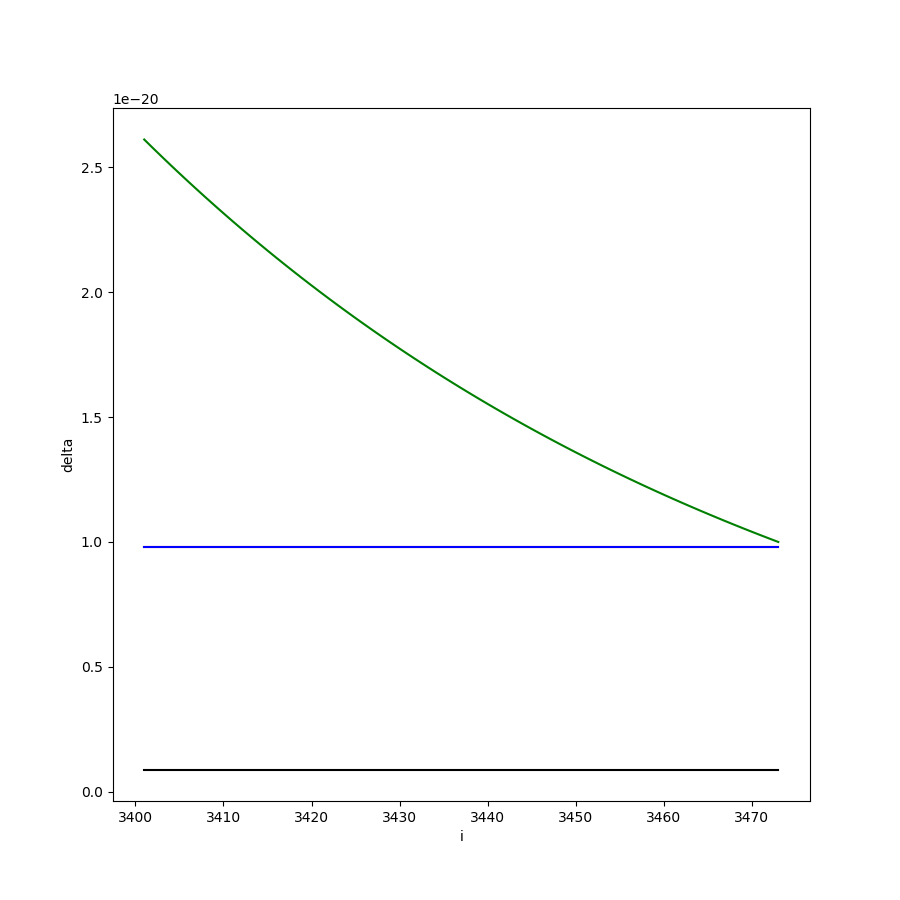

In [9]:
fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(ret.contents.lineCount):     
    sh=3400
    sz=count - sh
    #if x!=1:
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('i')
plt.show()